# Assessing the linear elastic range

_Produces Figure 3_

### Import packages

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter # for scalars in semilogy labels
from matplotlib.ticker import FormatStrFormatter

from pranzo import Analyzer
from bamboost import Manager

from utilities import set_plot_theme
set_plot_theme()

### Specify the path to the database

The database can be downloaded from the [ETH Research Collection](https://www.research-collection.ethz.ch/)

In [3]:
database_path = ('../out')

db = Manager(database_path)

### Generate the figure

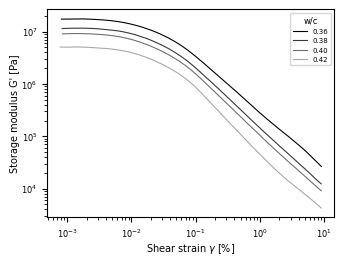

In [4]:
# read data
sims = [
    db['ler_opc36'], db['ler_opc38'],
    db['ler_opc40'], db['ler_opc42']
]

# create figure
fig_ler, ax = plt.subplots(figsize=(90/25.4, 70/25.4))

# plot data
for i in range(len(sims)):
    sim = sims[i]
    a = Analyzer(sim)
    rheo = a.rheo.phase("p7")

    gamma = rheo['shear_strain_pc'][:]
    G = rheo['storage_modulus_Pa'].filter(cutoff=0.02)
    ax.loglog(gamma, G, c='k', alpha=1-0.22*i, label=f"0.{sim.uid[-2:]}")

# add legend
ax.legend(title='w/c')

# set axes labels
ax.set_xlabel(rf"Shear strain $\gamma$ [%]")
ax.set_ylabel(rf"Storage modulus G' [Pa]")

# display figure
plt.tight_layout()
plt.show()